## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [323]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

In [380]:
data = load_boston()

In [381]:
X,y = data['data'],data['target']

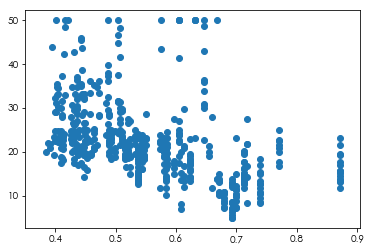

In [382]:
plt.scatter(X[:,4],y)

In [383]:
def random_function(x):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    return k*x+b

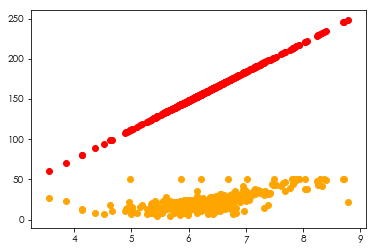

In [384]:

f = random_function(X[:,5])

plt.scatter(X[:,5],f,color= 'red')
plt.scatter(X[:,5],y,color= 'orange')

###### 1. Random Choose Method to get optimal *k* and *b*

In [385]:
def loss_function(y_predic, y):
    error = y-y_predic
    error = [pow(i,2) for i in error]
    loss = reduce(lambda x,y: x+y,error)/len(y)
    return loss

迭代4409之后，loss score 停留在了44.752937169960475 值

In [393]:
i=0
random.seed(2018)
while True:
    i = i+1
    f = random_function(X[:,5])
    socre = loss_function(f,y)
    if i == 1:min_score = socre
    if min_score>socre:
        min_score = socre
        print('loss function = ',min_score,'迭代 ',i,'次')
    
    if i >10000: break
    

loss function =  18659.021669816204 迭代  4 次
loss function =  12883.955558695647 迭代  17 次
loss function =  3278.733931249013 迭代  19 次
loss function =  77.99964461462464 迭代  63 次
loss function =  67.94721571541511 迭代  512 次
loss function =  51.7300122687747 迭代  1495 次
loss function =  46.06969901778657 迭代  2919 次
loss function =  45.733044835968386 迭代  3106 次
loss function =  44.752937169960475 迭代  4409 次


###### 2.Supervised Direction to get optimal *k* and *b*

第二种有方向的速度很快，到第801次，就将score锁定在了44.54871780039525

In [394]:
i = 0
random.seed(2018)
k = random.randint(-100,100)
b = random.randint(-100,100)
direction = {'first':[1,1],'second':[1,-1],'thrid':[-1,1],'forth':[-1,-1]}
dirct = random.choice([i for i in direction.keys()])

while True:
    i = i+1
    k = k + direction[dirct][0]*random.randint(0,10)
    b = b + direction[dirct][1]*random.randint(0,10)
    f = k*X[:,5]+b
    socre = loss_function(f,y)
    if i == 1:min_score = socre
    if min_score>socre:
        min_score = socre
        print('loss function = ',min_score,'迭代 ',i,'次')
    else:
        dirct = random.choice([i for i in direction.keys()])
    
    if i >10000: break

loss function =  34084.141166021764 迭代  2 次
loss function =  20166.55910945257 迭代  3 次
loss function =  15885.327680434768 迭代  4 次
loss function =  13461.485121863652 迭代  13 次
loss function =  6323.84224732806 迭代  14 次
loss function =  281.1376010731224 迭代  15 次
loss function =  269.2360181185773 迭代  17 次
loss function =  117.34311799011853 迭代  42 次
loss function =  49.722422316205545 迭代  44 次
loss function =  47.75182839525695 迭代  62 次
loss function =  44.54871780039525 迭代  801 次


Calculate the gradient from the loss function

$$f = Loss = \frac{\sum_{i=1}^{n}(y_i-\widehat{y})^2}{n}= \frac{\sum_{i=1}^{n}(y_i-(kx_i+b))^2}{n}$$
$$f =\frac{\sum_{i=1}^{n}({y_i}^2-2y_i({kx_i+b})+(kx_i+b)^2)}{n}$$


$$\frac{\partial{f}}{\partial{k}} = \frac{2k\sum{x_i}^2+2b\sum{x_i}-2\sum{y_i}{x_i}}{n}$$

$$\frac{\partial{f}}{\partial{b}} = \frac{2k\sum{x_i}+2b-2\sum{y_i}}{n}$$

if $\frac{\partial{f}}{\partial{k}}>0$, k should decrease, otherwise increase. 

if $\frac{\partial{f}}{\partial{b}}>0$, b should decrease, otherwise increase

In [371]:
sum_X = sum(X[:,5])
sum_X_2= sum([pow(i,2) for i in X[:,5]])
sum_y = sum(y)
sum_X_y = sum([X[:,5][i]*y[i] for i in range(len(y))])

In [372]:
def partial_k(k,b):
    return 2*k*sum_X_2+2*b*sum_X-2*sum_X_y>0

In [373]:
def partial_b(k,b):
    return 2*k*sum_X+2*b-2*sum_y>0

###### 3.Gradient Descent to get optimal *k* and *b*

用了梯度下降，更新比第二种方向性方法更频繁，收敛的更快，但结果有时候不如第二种好。有时结果很快达到收敛同是loss也很低，如下组

In [415]:
random.seed(33)
def gradient_descent(learning_rate):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    i = 0
    while True:
        if partial_k(k,b): 
            k = k-learning_rate
        else:
            k = k+learning_rate

        if partial_b(k,b):
            b = b-learning_rate
        else:
            b = b+learning_rate

        i = i+1
        f = k*X[:,5]+b
        socre = loss_function(f,y)

        if i == 1:min_score = socre

        if min_score>socre:
            min_score = socre
            print('loss function = ',min_score,'迭代 ',i,'次')
        if i >10000: break
gradient_descent(0.1)

loss function =  43598.96897367012 迭代  2 次
loss function =  43294.1538038281 迭代  3 次
loss function =  42990.409805853604 迭代  4 次
loss function =  42687.736979746485 迭代  5 次
loss function =  42386.135325506955 迭代  6 次
loss function =  42085.60484313481 迭代  7 次
loss function =  41786.14553263025 迭代  8 次
loss function =  41487.757393993015 迭代  9 次
loss function =  41190.440427223315 迭代  10 次
loss function =  40894.19463232101 迭代  11 次
loss function =  40599.0200092863 迭代  12 次
loss function =  40304.916558118995 迭代  13 次
loss function =  40011.88427881913 迭代  14 次
loss function =  39719.9231713868 迭代  15 次
loss function =  39429.03323582192 迭代  16 次
loss function =  39139.21447212449 迭代  17 次
loss function =  38850.46688029458 迭代  18 次
loss function =  38562.79046033206 迭代  19 次
loss function =  38276.185212237106 迭代  20 次
loss function =  37990.65113600956 迭代  21 次
loss function =  37706.18823164945 迭代  22 次
loss function =  37422.796499156844 迭代  23 次
loss function =  37140.475938531745

loss function =  593.7391074930629 迭代  256 次
loss function =  561.0015919885386 迭代  257 次
loss function =  529.335248351485 迭代  258 次
loss function =  498.7400765819021 迭代  259 次
loss function =  469.2160766797895 迭代  260 次
loss function =  440.76324864514686 迭代  261 次
loss function =  413.3815924779746 迭代  262 次
loss function =  387.0711081782729 迭代  263 次
loss function =  361.83179574604134 迭代  264 次
loss function =  337.66365518128015 迭代  265 次
loss function =  314.5666864839897 迭代  266 次
loss function =  292.5408896541692 迭代  267 次
loss function =  271.5862646918193 迭代  268 次
loss function =  251.70281159693982 迭代  269 次
loss function =  232.8905303695304 迭代  270 次
loss function =  215.14942100959166 迭代  271 次
loss function =  198.47948351712307 迭代  272 次
loss function =  182.880717892125 迭代  273 次
loss function =  168.35312413459718 迭代  274 次
loss function =  154.89670224454002 迭代  275 次
loss function =  142.51145222195288 迭代  276 次
loss function =  131.19737406683623 迭代  277 次
lo

###### 4. Try different Loss function and learning rate. 

如果将loss function改成  $$ f = \frac{\sum_{i=1}^{n}\mid(y_i-\widehat{y})\mid}{n} $$ 就无法使用求梯度的方法了

将learning rate 分别调整成1，5，10，试试看

In [417]:
random.seed(33)
gradient_descent(1)

loss function =  38276.185212237186 迭代  2 次
loss function =  35469.04718399799 迭代  3 次
loss function =  32769.02634250593 迭代  4 次
loss function =  30176.122687760857 迭代  5 次
loss function =  27690.336219762838 迭代  6 次
loss function =  25311.666938511822 迭代  7 次
loss function =  23040.114844007923 迭代  8 次
loss function =  20875.679936251003 迭代  9 次
loss function =  18818.36221524111 迭代  10 次
loss function =  16868.161680978264 迭代  11 次
loss function =  15025.078333462445 迭代  12 次
loss function =  13289.112172693674 迭代  13 次
loss function =  11660.263198671933 迭代  14 次
loss function =  10138.531411397236 迭代  15 次
loss function =  8723.916810869574 迭代  16 次
loss function =  7416.419397088938 迭代  17 次
loss function =  6216.039170055335 迭代  18 次
loss function =  5122.776129768772 迭代  19 次
loss function =  4136.63027622925 迭代  20 次
loss function =  3257.6016094367596 迭代  21 次
loss function =  2485.6901293913047 迭代  22 次
loss function =  1820.8958360928852 迭代  23 次
loss function =  1263.21872

In [419]:
random.seed(33)
gradient_descent(5)

loss function =  18818.36221524111 迭代  2 次
loss function =  10138.531411397236 迭代  3 次
loss function =  4136.63027622925 迭代  4 次
loss function =  812.6588097371545 迭代  5 次
loss function =  166.61701192094867 迭代  6 次
loss function =  154.87817732608704 迭代  9 次
loss function =  125.98786112055332 迭代  11 次


In [418]:
random.seed(33)
gradient_descent(10)

loss function =  4136.63027622925 迭代  2 次
loss function =  166.61701192094867 迭代  3 次


似乎介于0.1到1之间，是可优化的空间。大于1的明显学习率太长了。

In [423]:
random.seed(33)
gradient_descent(0.75)

loss function =  39719.92317138685 迭代  2 次
loss function =  37564.35846891984 迭代  3 次
loss function =  35469.04718399799 迭代  4 次
loss function =  33433.989316621395 迭代  5 次
loss function =  31459.18486679002 迭代  6 次
loss function =  29544.633834503802 迭代  7 次
loss function =  27690.336219762838 迭代  8 次
loss function =  25896.29202256708 迭代  9 次
loss function =  24162.5012429165 迭代  10 次
loss function =  22488.963880811138 迭代  11 次
loss function =  20875.679936251003 迭代  12 次
loss function =  19322.649409236037 迭代  13 次
loss function =  17829.872299766295 迭代  14 次
loss function =  16397.34860784177 迭代  15 次
loss function =  15025.078333462445 迭代  16 次
loss function =  13713.061476628336 迭代  17 次
loss function =  12461.298037339431 迭代  18 次
loss function =  11269.788015595717 迭代  19 次
loss function =  10138.531411397236 迭代  20 次
loss function =  9067.52822474395 迭代  21 次
loss function =  8056.778455635871 迭代  22 次
loss function =  7106.282104073003 迭代  23 次
loss function =  6216.03917005

In [421]:
random.seed(33)
gradient_descent(0.5)

loss function =  41190.440427223344 迭代  2 次
loss function =  39719.92317138685 迭代  3 次
loss function =  38276.185212237186 迭代  4 次
loss function =  36859.2265497742 迭代  5 次
loss function =  35469.04718399799 迭代  6 次
loss function =  34105.64711490857 迭代  7 次
loss function =  32769.02634250593 迭代  8 次
loss function =  31459.18486679002 迭代  9 次
loss function =  30176.122687760857 迭代  10 次
loss function =  28919.839805418465 迭代  11 次
loss function =  27690.336219762838 迭代  12 次
loss function =  26487.61193079401 迭代  13 次
loss function =  25311.666938511822 迭代  14 次
loss function =  24162.5012429165 迭代  15 次
loss function =  23040.114844007923 迭代  16 次
loss function =  21944.50774178606 迭代  17 次
loss function =  20875.679936251003 迭代  18 次
loss function =  19833.631427402666 迭代  19 次
loss function =  18818.36221524111 迭代  20 次
loss function =  17829.872299766295 迭代  21 次
loss function =  16868.161680978264 迭代  22 次
loss function =  15933.230358876966 迭代  23 次
loss function =  15025.0783334

In [422]:
random.seed(33)
gradient_descent(0.25)

loss function =  42687.736979746514 迭代  2 次
loss function =  41935.741291399136 迭代  3 次
loss function =  41190.440427223344 迭代  4 次
loss function =  40451.83438721929 迭代  5 次
loss function =  39719.92317138685 迭代  6 次
loss function =  38994.70677972619 迭代  7 次
loss function =  38276.185212237186 迭代  8 次
loss function =  37564.35846891984 迭代  9 次
loss function =  36859.2265497742 迭代  10 次
loss function =  36160.789454800266 迭代  11 次
loss function =  35469.04718399799 迭代  12 次
loss function =  34783.99973736746 迭代  13 次
loss function =  34105.64711490857 迭代  14 次
loss function =  33433.989316621395 迭代  15 次
loss function =  32769.02634250593 迭代  16 次
loss function =  32110.758192562105 迭代  17 次
loss function =  31459.18486679002 迭代  18 次
loss function =  30814.306365189623 迭代  19 次
loss function =  30176.122687760857 迭代  20 次
loss function =  29544.633834503802 迭代  21 次
loss function =  28919.839805418465 迭代  22 次
loss function =  28301.74060050481 迭代  23 次
loss function =  27690.3362197

最后的结果停留在78左右。其中当learning rate = 0.75时，迭代次数最少

下面将loss function 改成 $$ f = \frac{\sum_{i=1}^{n}\mid(y_i-\widehat{y})\mid}{n} $$ 试试第二种方法

In [429]:
def loss_function_2nd(f,y):
    return reduce(lambda x,y:x+y,[abs(y[i]-f[i])for i in range(len(y))])

In [434]:
i = 0
random.seed(2018)
k = random.randint(-100,100)
b = random.randint(-100,100)
direction = {'first':[1,1],'second':[1,-1],'thrid':[-1,1],'forth':[-1,-1]}
dirct = random.choice([i for i in direction.keys()])

while True:
    i = i+1
    k = k + direction[dirct][0]*random.randint(0,10)
    b = b + direction[dirct][1]*random.randint(0,10)
    f = k*X[:,5]+b
    socre = loss_function_2nd(f,y)
    if i == 1:min_score = socre
    if min_score>socre:
        min_score = socre
        print('loss function = ',min_score,'迭代 ',i,'次')
    else:
        dirct = random.choice([i for i in direction.keys()])
    
    if i >10000: break

loss function =  92667.42500000009 迭代  2 次
loss function =  71275.22500000008 迭代  3 次
loss function =  63253.15 迭代  4 次
loss function =  58267.075 迭代  13 次
loss function =  39836.95000000002 迭代  14 次
loss function =  7918.255000000006 迭代  15 次
loss function =  7754.619999999996 迭代  17 次
loss function =  4794.989000000003 迭代  42 次
loss function =  2549.974000000002 迭代  44 次
loss function =  2324.7719999999977 迭代  62 次
loss function =  2322.250999999999 迭代  801 次


试了几个随机的结果，都是将loss function 优化到了2000+

## 2. Answer following questions: -15 minutes

<font size = '2px' color = 'blue'>I finished this tasked right immediately after class. All the questions are clearly illustrated or mentioned in class and they are not difficult to answer. Typing mathmatical formula takes some time for I am still at the begining of learning LaTex </font>


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Because creating a complicated formula need luck and talent and effort. Ecept some geniuses, not many people can achieve this goal. Also, some problems pattern(formula) are too hard to find by human. Using machine to dicover the optimal function from large amount of data for us is more applicable today.</font>
</td></tr></table>

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>It has no direction of updates, every updates direction is chosen by random and cannot inherit efficient direction in history.We have to wait the program to find the right direction by chances. Therefore, it is very time-consuming, especially when number of variables gets larger and larger(less chances of finding the right direction when choices increase)  </font>
</td></tr></table>

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Yes, the 2nd method is better than the 1st one. First of all,it does not choose direction to update randomly because it identify the total direction initailly and will insist on one direction when it finds it useful. It can inherit the right direction when it finds it. Keep going on the right direction. That's why it can be much more efficient than the 1st one. </font>
    
<font size = '2px'>However, when it has not found the right direction. It still has to choose direction randomly. Although now it has some limited and concrete choice of direction to choose, it could still be time-consuming when the number of variables gets larger, which increase the choices and less the chances of choosing the right direction. </font>
    
Two parameter $a_0$ and $a_1$ 
$$\left\lgroup\begin{matrix}+1 & -1 \cr +1 & +1 \cr -1 & +1 \cr -1 & -1\end{matrix}\right\rgroup_{4*2}$$

N parameter $a_0 ... a_n$ 
$$\left\lgroup\begin{matrix}+1 & ... & -1 \cr \vdots & ... &  \vdots \cr \vdots & ... & \vdots \cr -1 & ... & -1\end{matrix}\right\rgroup_{n^2*n}$$    
    
    
We could see when parameters increase, the chance of choosing the right row(direction) decrease exponentially. 
</td></tr></table>

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Because Gredient indicates the fastest increase and decrease direction of a function at one particular point. Our ultimate goal is to choosing a set of parameters to minimized the loss function $$loss = \frac{\sum_{i=1}^{n}(y_i-\widehat{y})^2}{n}$$ </font>
    
    
<font size = '2px'>Where the part $(y_i-\widehat{y})^2$ can be expressed as a function represented by parameter $a_0 ... a_n$ </font>
    
<font size = '2px'>Hence taking the partial differentiation of $a_0 ... a_n$    $$f_{a_i}=(\frac{\partial f}{\partial{a_i}})$$ </font>
    
<font size = '2px'>Is the decrease or increase direction at a particular point $(x_{0_i}...x_{n_i})$ </font>

<font size = '2px'>Knowing the increase or decrease direction of the loss function, we could choose that to lower down our loss score  </font>
</td></tr></table>

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Gredient is the partial derivatives of the loss function  $$loss = \frac{\sum_{i=1}^{n}(y_i-\widehat{y})^2}{n}$$ </font>
    
    

    
<font size = '2px'>Gredient   $$f_{a_i}=(\frac{\partial f}{\partial{a_i}})$$ </font>
    
<font size = '2px'>Descent means we should choose the direction that lower down the loss function, make the loss function "Descent"

</td></tr></table>

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Using Gredient, we could clearly know which direction we should choose to update instead of randomly search. Every update is efficent. </font>

</td></tr></table>

###### 7. Using the simple words to describe: What's the machine leanring.

<table><tr><td bgcolor="cornsilk"> 
<font size = '2px'>Answer: </font>

<font size = '2px'>Machine learn from data to generate an optimal function for a problem using algorithm</font>

</td></tr></table>

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 2.	Preprocessing data from page source.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> c.	the Regular Expression you may need to process the text information.

> d.	You may need @package networkx, @package matplotlib to visualize data. 

> e.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> f.	You may need the defaultdict, set data structures to implement this procedure. 

## Use web crawler to request the main webpage -30mintues
<font size = '2px' color = 'blue'> I got ssl Error when I try to use the requests.get(). I spend most of the time debuging and finding suggestion online. I find including $verfiy = False$ sovle the problem but I forgot to paste the url of that answer. I should be more conscious of taking debug note next time. 

In [277]:
import os
import re
import matplotlib.pyplot as plt
import requests
import warnings
import googlemaps
import math
warnings.filterwarnings("ignore")

In [2]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

In [3]:
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}

In [4]:
response = requests.get(url,headers=headers,verify=False)

In [5]:
rep = response.content.decode()

## Use regular expression to match the station name for each subway line-5.5hours
<br/>
<font size = '2px' color = 'blue'> I am not so familar with regular expression and that's why I encountered so much problems during the process. </font>
<br/>
<br/>
<font size = '2px' color = 'blue'>The biggest error I made is to try to match all the station from different websites usign only one regular expression without any parsing. That made me crazy of trying to create a genius regular expression to sovle the problem at one line, which is impossible for me. </font>
<br/>
<br/>
<font size = '2px' color = 'blue'>Gradually, I find parsing the website into different small section could make the job done much more easier. I started to get the essence of matching is to limit the scope of mathch at first and then limit it further. </font>
<br/>
<br/>
<font size = '2px' color = 'blue'>This time, I left some notes about my thinking during the problem-sovling process, which could remind me of what mistakes to avoid next time </font>

#### Match the href link in the first main page

In [6]:
pattern = re.compile(r'<a target=_blank href="(.*?)">(北京地铁[\w\d]{0,3}线)</a>')

In [7]:
matches = pattern.finditer(rep)

不知道为什么，就是选不到7号线。。。。明明匹配完全符合啊。
查看了一下rep里面的信息，发现根本没有关于7号线的链接，但是网页端确有。。
待会儿自己补上没查找到的线路吧

解决了--原来来是正则表达式的贪婪模式下尽可能多的匹配，出现了无视我规则的情况
最好是分段进行正则匹配，统一正则匹配很难用一条指令完成所有可能情况的匹配

#### Construct chirdlink for further request and match/

In [8]:

linedic = {}
for match in matches:
    childurl = 'https://baike.baidu.com'+ match.group(1)
    linename = match.group(2)
    linedic[linename]=childurl


#### Match the subway station in different pages.
######  Parsing pages into smaller section and then use simple regular expresssion is much more efficient.

In [9]:
patternselect = re.compile(r'车站名称')
patternselectend = re.compile(r'</table')
patternname = re.compile(r'[0-9]?[\u4e00-\u9fa5]{2,}站')
# patternfinal = re.compile(r'[\u4e00-\u9fa5]+')
bigdic = {}
page = 0
for key,value in linedic.items():
    s_url = value
    s_rep = requests.get(s_url,headers=headers, verify =False)
    content = s_rep.content.decode()
    s_match = patternselect.finditer(content)
    for s in s_match:
        begin  = s.span()[0]
        break
    content = content[begin:]
    s_matchend = patternselectend.finditer(content)
    for i in s_matchend:
        end  = i.span()[0]
        break
    
    content = content[:end]
    new_match = patternname.finditer(content)
    stationlist= []
    for n in new_match:
        s_name =n.group(0)
        stationlist.append(s_name)
#         except:
#             s_name =n.group(0)
#         final = patternfinal.finditer(s_name)
#         for f in final:
#             stationlist.append(f.group(0))
    bigdic[key]=stationlist


获取到了所有线路的车站名字，但是还有一些是匹配不当的结果混进去了。要筛选出来

In [46]:
bigdic.keys()

dict_keys(['北京地铁1号线', '北京地铁13号线', '北京地铁八通线', '北京地铁5号线', '北京地铁8号线', '北京地铁10号线', '北京地铁机场线', '北京地铁4号线', '北京地铁15号线', '北京地铁昌平线', '北京地铁大兴线', '北京地铁房山线', '北京地铁亦庄线', '北京地铁9号线', '北京地铁6号线', '北京地铁14号线', '北京地铁7号线', '北京地铁16号线', '北京地铁西郊线', '北京地铁S1线', '北京地铁燕房线', '北京地铁2号线'])

## Using Google map Geocode API to find the coordinate of each subway -2.5hours 
<br/>
<font size = '2px' color = 'blue'>First, setting API key as the envrionmental variable brought me a lot of problem,such as jupyterLab cannot find the environmental variables and I have to use juptyer notebook.Set the envrionmental variable in ~/.bash_profile works for me, instead of /etc/profile, which could not be sourced. </font>
<br/>
<br/>
<font size = '2px' color = 'blue'>Using the Google map API also brought some probelms. I accidentaly reach the maximal query limit and was refused so many times but don't know what was going on. To solve this, I have to create a new API KEY and set time.sleep for not irritating the google sever.  </font>


In [10]:
api_key = os.getenv("MYKEY")

In [12]:
gm = googlemaps.Client(key=api_key)

google api 如果查找错误地点会查找很久，所以可以用这个做错误地点的标示符号，设置查找时间，如果超过这个查找时间，直接pass掉这个地点

In [29]:
import time
import timeout_decorator

In [31]:
@timeout_decorator.timeout(5)
def geocoding(name):
    geocode_result = gm.geocode(name)[0]
    address = geocode_result['geometry']['location']
    return address

In [39]:
largedic ={}
for key, value in bigdic.items():
    largedic[key] ={} 
    for name in value:
        largedic[key][name]=''
        try:
            address = geocoding(name)
            lat = address['lat']
            lon = address['lng']
            lonlat =[lon,lat]
        except:
            lonlat = 0 #对于google map api找不到的站，先标为0，之后手动进行添加
        largedic[key][name]=lonlat
#         print(largedic)
        time.sleep(2)
    time.sleep(2)    

## Manually correct and clean the wrong coordinate -1hours 

手动添加剩下的站点，

对照高德地图地铁站：http://map.amap.com/subway/index.html?&1100

和百度坐标拾取系统：http://api.map.baidu.com/lbsapi/getpoint/index.html

将不存在和已经废弃的站点或者目前没有在高德地图上而google api又查找不到的站点，删除。

后悔用了谷歌api，但是人在国外用注册不了百度api，而且发现时为时已晚

创建一个函数，对于所有值为0的匹配错误的站点进行删除操作

In [60]:
def dropstation(linename):
    droplist= []
    for key,value in largedic[linename].items():
        if value == 0:
            droplist.append(key)
    for i in droplist:
        largedic[linename].pop(i,None)

In [50]:
#地铁十三号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁13号线')
#地铁5号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁5号线')
#地铁10号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁10号线')
#地铁机场号线：value 为0 的站全部为匹配错误的站，删除一个重复站点
largedic['北京地铁机场线'].pop('2号航站',None)
dropstation('北京地铁机场线')
#地铁4号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁4号线')
#地铁9号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁9号线')
#地铁7号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁7号线'）
#地铁2号线：value 为0 的站全部为匹配错误的站
dropstation('北京地铁2号线')
largedic['北京地铁2号线']['和平门站']=[116.390619,39.906362]
#地铁8号线
largedic['北京地铁8号线']['大红门南站']=[116.407454,39.842626]
largedic['北京地铁8号线']['和义站']=[116.408508,39.821382]
largedic['北京地铁8号线']['东高地站']=[116.415686,39.811433]
largedic['北京地铁8号线']['火箭万源站']=[116.425129,39.805336]
largedic['北京地铁8号线']['瀛海站']=[116.455615,39.766756]
largedic['北京地铁8号线'].pop('瀛海南站',None)
largedic['北京地铁8号线'].pop('金鱼胡同站',None)
#地铁15号线
largedic['北京地铁15号线']['孙河站']=[116.54104,40.051264]
#地铁昌平线
largedic['北京地铁昌平线']['沙河站']=[116.295058,40.154693]
#地铁房山线
largedic['北京地铁房山线']['阎村东站']=[116.107001,39.734677]
dropstation('北京地铁房山线')
#地铁亦庄线
largedic['北京地铁亦庄线']['亦庄火车站']=[116.608099,39.818275]
dropstation('北京地铁亦庄线')
#地铁6号线
largedic['北京地铁6号线']['杨庄站']=[116.194192,39.934174]
largedic['北京地铁6号线']['西黄村站']=[116.213386,39.939411]
largedic['北京地铁6号线']['田村站']=[116.259357,39.935623]
#地铁14号线
largedic['北京地铁14号线']['景泰站']=[116.417164,39.871443]
largedic['北京地铁14号线']['北工大西门站']=[116.484017,39.880747]
dropstation('北京地铁14号线')
#地铁16号线
largedic['北京地铁16号线']['屯佃站']=[116.222442,40.074106]
dropstation('北京地铁16号线')
#地铁西郊线
largedic['北京地铁西郊线']['茶棚站']=[116.25461,39.988011]
largedic['北京地铁西郊线']['万安站']=[116.238603,39.989737]
dropstation('北京地铁西郊线')
#地铁S1号线
largedic['北京地铁S1线']['四道桥站']=[116.140356,39.922119]
largedic['北京地铁S1线']['桥户营站']=[116.132271,39.918355]
largedic['北京地铁S1线']['上岸站']=[116.128714,39.911139]
largedic['北京地铁S1线']['小园站']=[116.121001,39.896156]
largedic['北京地铁S1线']['石厂站']=[116.106975,39.895137]
#地铁燕房线
largedic['北京地铁燕房线']['阎村东站']=[116.107001,39.734677]
largedic['北京地铁燕房线']['阎村站']=[116.086807,39.722483]
largedic['北京地铁燕房线']['星城站']=[116.067772,39.719734]
largedic['北京地铁燕房线']['大石河东站']=[116.046084,39.716115]
largedic['北京地铁燕房线']['马各庄站']=[116.023054,39.711154]
dropstation('北京地铁燕房线')
#地铁一号线
largedic['北京地铁1号线']['南礼士路站']=[116.359221,39.912979]
largedic['北京地铁1号线']['四惠东站']=[116.522347,39.914943]
largedic['北京地铁1号线']['国贸站']=[116.467523,39.914435]
largedic['北京地铁1号线'].pop('花庄站',None)
largedic['北京地铁1号线'].pop('高碑店站',None)
dropstation('北京地铁1号线')

剔除outlier站点，这些不是地铁站，但是不知道为什么在百度网页上面，而且还给谷歌地图找到了坐标。或者是真实的地铁站，但是谷歌地图找错了坐标。啊google！！！！

In [249]:
for key, value in largedic.items():
    dropstation=['学院桥站','老城区站','东管头站','小马庄站','环球影城站']
    changecoord={'小红门站':[116.390619,39.906362],'植物园站':[116.221373,39.999254],
    '国贸站':[116.467523,39.914435],'石门站':[116.647499,40.136314],'德茂站':[116.448258,39.778312],
     '动物园站':[116.345204,39.943923],'香山站':[116.211114,39.999821],'新街口站':[116.374132,39.94658],
     '高碑店站':[116.538,39.915798],'桥湾站':[116.414901,39.899001]}
    
    for i in dropstation:
        if i in largedic[key]:
            largedic[key].pop(i,None)
    
    for c_name,c_coord in changecoord.items():
        if c_name in largedic[key]:
            largedic[key][c_name]=c_coord
    

In [250]:
largedic

{'北京地铁1号线': {'高井站': [116.143944, 39.949768],
  '福寿岭站': [116.172241, 39.939926],
  '苹果园站': [116.177864, 39.926261],
  '古城站': [116.190296, 39.90743399999999],
  '八角游乐园站': [116.212684, 39.907442],
  '八宝山站': [116.235948, 39.90744],
  '玉泉路站': [116.25299, 39.907414],
  '五棵松站': [116.273987, 39.907456],
  '万寿路站': [116.294875, 39.9077482],
  '公主坟站': [116.30992, 39.907447],
  '军事博物馆站': [116.321671, 39.907464],
  '木樨地站': [116.337583, 39.907379],
  '南礼士路站': [116.359221, 39.912979],
  '复兴门站': [116.357641, 39.907252],
  '西单站': [116.374253, 39.907422],
  '天安门西站': [116.391278, 39.90747200000001],
  '天安门东站': [116.401216, 39.90778],
  '王府井站': [116.41148, 39.90807600000001],
  '东单站': [116.417935, 39.908322],
  '建国门站': [116.435783, 39.908483],
  '永安里站': [116.450372, 39.908465],
  '国贸站': [116.467523, 39.914435],
  '大望路站': [116.476226, 39.908317],
  '四惠站': [116.495516, 39.908785],
  '四惠东站': [116.522347, 39.914943],
  '传媒大学站': [116.554692, 39.90914799999999],
  '双桥站': [116.576697, 39.910282],
  '管庄站': [116.5

## Visualization of the subway line -2 hours
I tired different method to plot the subway lines and stations and learn how to used defaultdict to render nodes and edges directly to the drawing.

finally, I successfuly plot all of the line and stations in one graph. However, I don't know how to assgin color to each sepercific line.

You may find the visualization of the subway lines are some kind of messy. You will find out why it is such a messy in the future

In [111]:
import networkx as nx
from collections import defaultdict
plt.rcParams['font.sans-serif'] = ['STHeiti'] 
plt.rcParams['axes.unicode_minus'] = False

In [179]:
lines = list(largedic.keys())

In [197]:
subway = nx.Graph()

In [251]:
station_connection = defaultdict(list)

In [252]:
i = 1
for key, value in largedic.items():
    if i == 1:
        d1= value
        d_sum = dict(d1)
        i+=1
    d_sum.update(value)


In [253]:
for key,value in largedic.items():
    stations = list(largedic[key].keys())
    for i in range(len(stations)-1):
        if stations[i+1] in station_connection[stations[i]]:continue
        station_connection[stations[i]].append(stations[i+1])

In [254]:
s_c_g = nx.Graph(station_connection)

In [255]:
station_connection

defaultdict(list,
            {'高井站': ['福寿岭站'],
             '福寿岭站': ['苹果园站'],
             '苹果园站': ['古城站', '杨庄站', '金安桥站'],
             '古城站': ['八角游乐园站'],
             '八角游乐园站': ['八宝山站'],
             '八宝山站': ['玉泉路站'],
             '玉泉路站': ['五棵松站'],
             '五棵松站': ['万寿路站'],
             '万寿路站': ['公主坟站'],
             '公主坟站': ['军事博物馆站', '西钓鱼台站'],
             '军事博物馆站': ['木樨地站', '白堆子站'],
             '木樨地站': ['南礼士路站', '玉渊潭东门站'],
             '南礼士路站': ['复兴门站'],
             '复兴门站': ['西单站', '阜成门站'],
             '西单站': ['天安门西站', '灵境胡同站'],
             '天安门西站': ['天安门东站'],
             '天安门东站': ['王府井站'],
             '王府井站': ['东单站', '前门站'],
             '东单站': ['建国门站', '灯市口站'],
             '建国门站': ['永安里站', '北京站'],
             '永安里站': ['国贸站'],
             '国贸站': ['大望路站', '双井站'],
             '大望路站': ['四惠站', '金台路站'],
             '四惠站': ['四惠东站'],
             '四惠东站': ['传媒大学站', '高碑店站'],
             '传媒大学站': ['双桥站'],
             '双桥站': ['管庄站'],
             '管庄站': ['八里桥站'],
         

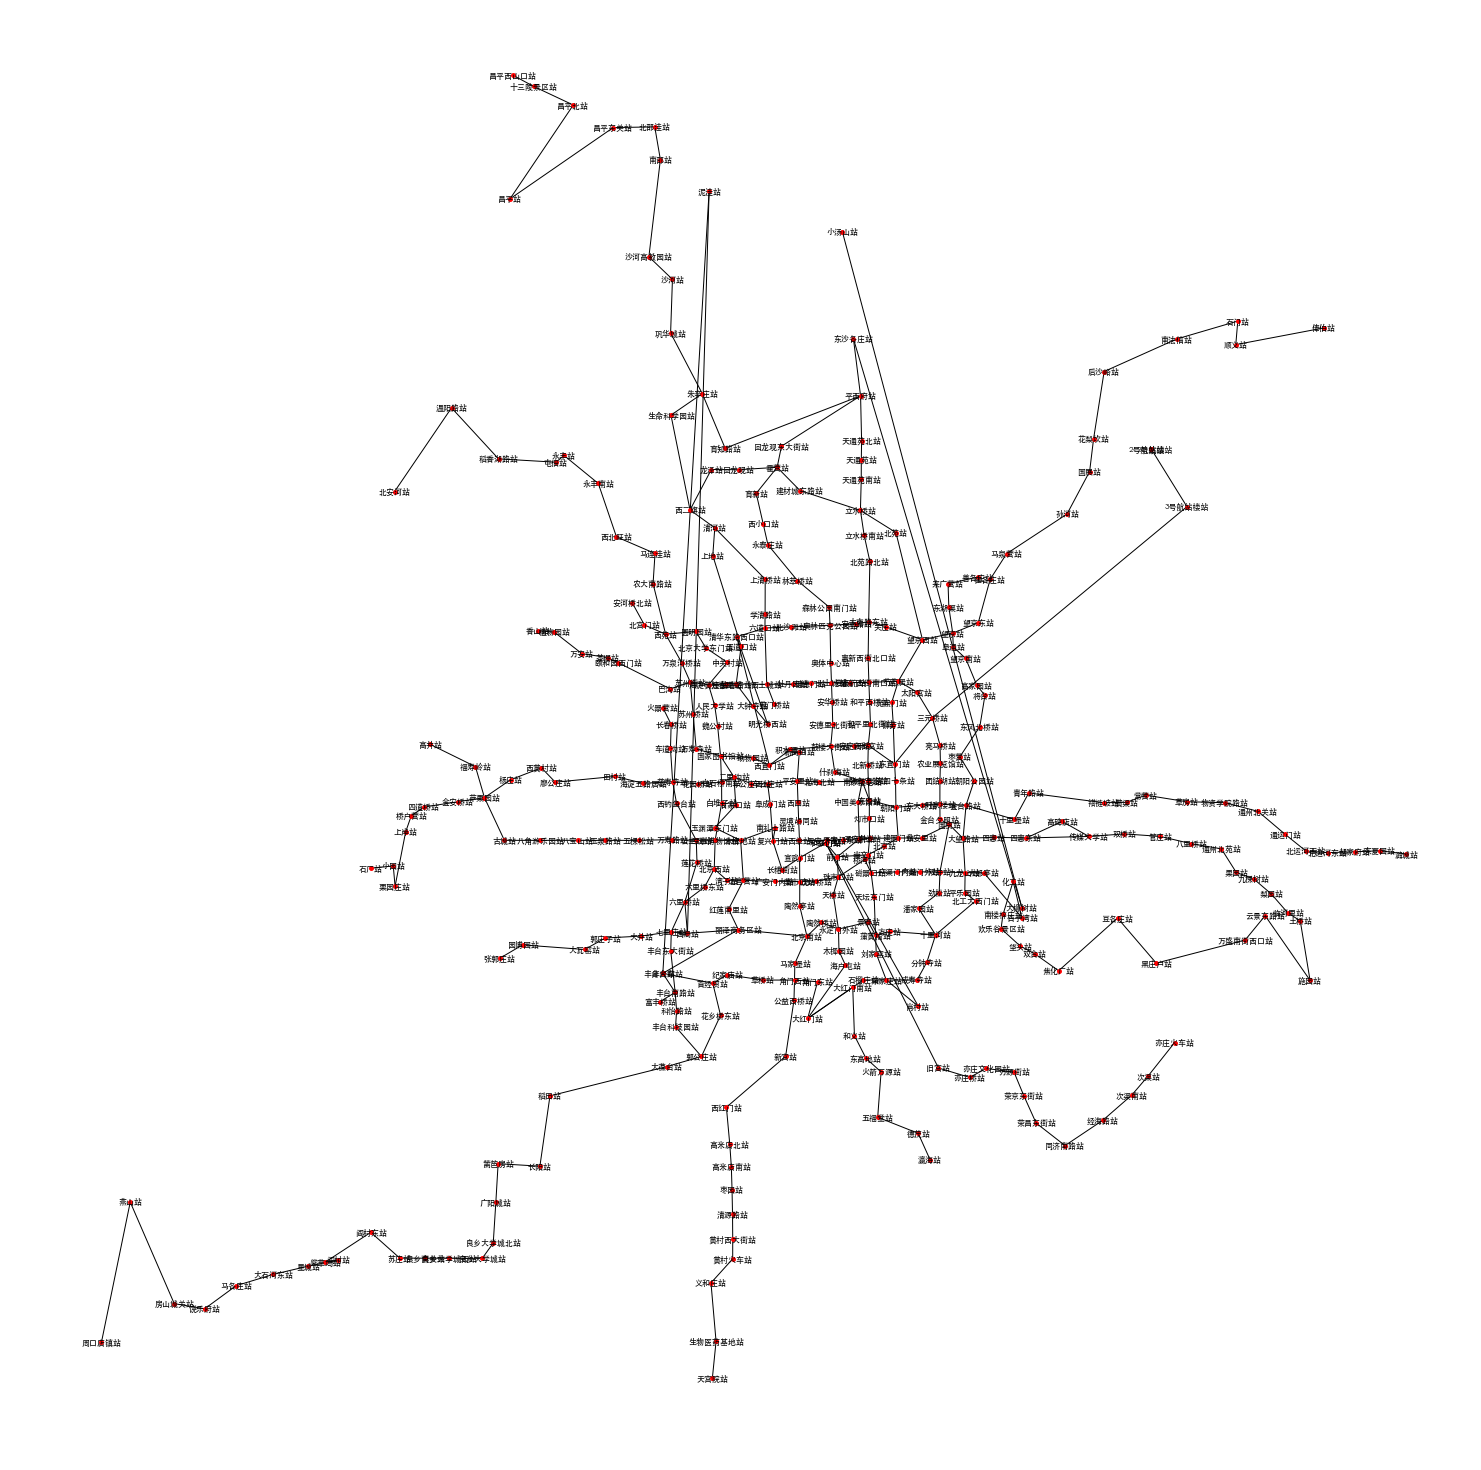

In [258]:
plt.figure(figsize=(20, 20))
nx.draw(s_c_g,d_sum, with_labels=True,font_size=8,node_size=15)

##### 3. Build the search agent --2 hours 

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门


In this part I first spend some time read through instructor's codes. After making sure that I understand the essence of the codes, I tried to wrtie the code by myself. The thinking behind BFS and DFS and the algorithm are beautiful

In [260]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

This is the most beautiful algorithm. With a few lines of code, you can achieve planning the route for subway users! 

The sorting function used in this codes to adjust for different mode is excellent

In [262]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        for station in connection_graph[frontier]:
            if station in seen: continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == destination:return new_path
        pathes = sort_candidate(pathes)
        seen.add(frontier)

相当于深度优先搜索， 这种方法采用长的线路先搜索，不一定能找到transfer最少的路线，有时候能找到transfer最少的，有时候不能。不确定这种搜索方法的归类--“看运气的搜索？”


In [274]:
def transfer_first(pathes):
    return sorted(pathes,key=len,reverse= True)

相当于广度优先搜索，这种方法采用短路线优先搜索，能很找到transfer最少的路线

In [483]:
def transfer_less(pathes):
    return sorted(pathes,key=len)

In [268]:
def get_geo_distance(s1,s2):
    long1, lat1 = d_sum[s1]
    long2, lat2 = d_sum[s2]
    orgin = (lat1,long1)
    destination = (lat2,long2)
    return  geo_distance(orgin,destination)

In [291]:
def shortest_distance_first(pathes):
    if len(pathes)<=1:return pathes
    
    def get_plan_distance(path):
        distance = 0
        start = path[0]
        for i in path[1:]:
            distance += get_geo_distance(start,i)
            start = i 
        return distance
        
    return sorted(pathes,key=get_plan_distance)

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


In [271]:
search('瀛海站', '昌平站',s_c_g,transfer_most)

['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '海户屯站',
 '木樨园站',
 '永定门外站',
 '天桥站',
 '珠市口站',
 '前门站',
 '王府井站',
 '天安门东站',
 '天安门西站',
 '西单站',
 '复兴门站',
 '南礼士路站',
 '木樨地站',
 '军事博物馆站',
 '公主坟站',
 '万寿路站',
 '五棵松站',
 '玉泉路站',
 '八宝山站',
 '八角游乐园站',
 '古城站',
 '苹果园站',
 '杨庄站',
 '西黄村站',
 '廖公庄站',
 '田村站',
 '海淀五路居站',
 '慈寿寺站',
 '花园桥站',
 '白石桥南站',
 '国家图书馆站',
 '动物园站',
 '西直门站',
 '清华东路西口站',
 '明光桥西站',
 '大钟寺站',
 '知春路站',
 '五道口站',
 '上地站',
 '清河站',
 '西二旗站',
 '龙泽站',
 '回龙观站',
 '霍营站',
 '建材城东路站',
 '立水桥站',
 '天通苑南站',
 '天通苑站',
 '天通苑北站',
 '平西府站',
 '育知路站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站']

In [275]:
search('瀛海站', '昌平站',s_c_g,transfer_first)

['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '海户屯站',
 '木樨园站',
 '永定门外站',
 '天桥站',
 '珠市口站',
 '前门站',
 '王府井站',
 '天安门东站',
 '天安门西站',
 '西单站',
 '复兴门站',
 '南礼士路站',
 '木樨地站',
 '军事博物馆站',
 '公主坟站',
 '万寿路站',
 '五棵松站',
 '玉泉路站',
 '八宝山站',
 '八角游乐园站',
 '古城站',
 '苹果园站',
 '杨庄站',
 '西黄村站',
 '廖公庄站',
 '田村站',
 '海淀五路居站',
 '慈寿寺站',
 '花园桥站',
 '白石桥南站',
 '国家图书馆站',
 '动物园站',
 '西直门站',
 '清华东路西口站',
 '明光桥西站',
 '大钟寺站',
 '知春路站',
 '五道口站',
 '上地站',
 '清河站',
 '西二旗站',
 '龙泽站',
 '回龙观站',
 '霍营站',
 '建材城东路站',
 '立水桥站',
 '天通苑南站',
 '天通苑站',
 '天通苑北站',
 '平西府站',
 '育知路站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站']

In [292]:
search('瀛海站','昌平站',s_c_g,shortest_distance_first)

['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '角门东站',
 '角门西站',
 '马家堡站',
 '北京南站',
 '陶然亭站',
 '菜市口站',
 '宣武门站',
 '西单站',
 '灵境胡同站',
 '西四站',
 '平安里站',
 '新街口站',
 '西直门站',
 '清华东路西口站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '生命科学园站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站']

能run出来结果实在令我太开心了！对比了高德地图的结果，发现中间有部分线路不一样。详细对比了高德地图地铁站：http://map.amap.com/subway/index.html?&1100 之后

发现我的结果会发生不同线之间站与站的跳跃。比如'珠市口站'之间跳到了'前门站'。

起初以为是join所有站点连接的时候出错了。将前一条线的最后一站和后一条线的站点连到了一起。但检查发现不是

![](https://raw.githubusercontent.com/haomingsama/NLP/master/nlp_Assign%232/WechatIMG842.png)

检查结果发现：前门站的下一站居然是包含了珠市口。觉得有蹊跷。于是查了包含前门站的两条线路：8号线和2号线。其中8号线的百度百科网页显示，前门站的下一站是珠市口站。。。。

类似还有一些站点跳跃的错误，应该都是百度百科的锅

![](https://raw.githubusercontent.com/haomingsama/NLP/master/nlp_Assign%232/WechatIMG844.png)

In [284]:
station_connection['珠市口站']

['天桥站', '桥湾站']

In [285]:
s_c_g['珠市口站']

AtlasView({'前门站': {}, '天桥站': {}, '桥湾站': {}, '虎坊桥站': {}})

In [286]:
station_connection['前门站']

['珠市口站', '和平门站']

In [287]:
for key, value in largedic.items():
    dropstation=['前门站']
    
    for i in dropstation:
        if i in largedic[key]:
            print(key)
    

北京地铁8号线
北京地铁2号线


In [288]:
largedic['北京地铁8号线']

{'朱辛庄站': [116.313662, 40.104346],
 '育知路站': [116.327896, 40.080257],
 '平西府站': [116.412338, 40.103367],
 '回龙观东大街站': [116.363025, 40.081154],
 '霍营站': [116.360322, 40.071848],
 '育新站': [116.347271, 40.060384],
 '西小口站': [116.351658, 40.046845],
 '永泰庄站': [116.35458, 40.037728],
 '林萃桥站': [116.372998, 40.021906],
 '森林公园南门站': [116.392764, 40.010234],
 '奥林匹克公园站': [116.393295, 40.002253],
 '奥体中心站': [116.393742, 39.985803],
 '北土城站': [116.394193, 39.976953],
 '安华桥站': [116.394608, 39.96863],
 '安德里北街站': [116.394988, 39.958707],
 '鼓楼大街站': [116.393776, 39.948972],
 '什刹海站': [116.396247, 39.937563],
 '南锣鼓巷站': [116.4133492, 39.9334746],
 '中国美术馆站': [116.410775, 39.924391],
 '王府井站': [116.41148, 39.90807600000001],
 '前门站': [116.397875, 39.90019400000001],
 '珠市口站': [116.39841, 39.891279],
 '天桥站': [116.395331, 39.883495],
 '永定门外站': [116.398559, 39.868334],
 '木樨园站': [116.398865, 39.858707],
 '海户屯站': [116.402885, 39.852478],
 '大红门站': [116.379377, 39.828963],
 '大红门南站': [116.407454, 39.842626],
 '和义站': [116.408508,

## （Optional）Create different policies for transfer system.--（30mins）


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [451]:
def find_way(start,destination,strategy_choice,graph = s_c_g):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        for station in get_successor(frontier,graph):
            if station in seen: continue
            new_path = path + [station]
            pathes.append(new_path)
            if is_goal(station,destination):return new_path
        pathes = strategy(strategy_choice, pathes)
        seen.add(frontier)

In [437]:
def is_goal(station,destination):
    if station == destination: return True

In [439]:
def get_successor(frontier,connection_graph):
    successor_list = [station for station in connection_graph[frontier]]
    return successor_list

I don’t know the meaning of ‘Comprehensive Priority‘, so I just assgin transfer_first(pathes)for it. Maybe Comprehensive priority need to consider time, transfer, fee and population

In [486]:
def strategy(choice,pathes):
    if choice == 'Shortest Path Priority':
        return shortest_distance_first(pathes)
    elif choice == 'Minimum Transfer Priority':
        return transfer_less(pathes)
    elif choice == 'Comprehensive Priority':
        return transfer_first(pathes)

In [477]:
def get_routes(start,destination,strategy_choice,by_way,graph = s_c_g):
        final_routes = [start]
        des = by_way+[destination]
        print('从%s开始，经过%s，到达%s'%(start,by_way,destination))
        if len(des)==1:return find_way(start,destination,strategy_choice)
        
        for middle in des:
            if middle == des[-1]:
                routes = find_way(start,middle,strategy_choice)
                final_routes=final_routes + routes[1:]
            
            routes = find_way(start,middle,strategy_choice)
            start = middle
            final_routes= final_routes+routes[1:] 
            
            
       
        return final_routes


In [481]:
get_routes('瀛海站','昌平站','Shortest Path Priority',['大红门站','亦庄火车站'])

从瀛海站开始，经过['大红门站', '亦庄火车站']，到达昌平站


['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '石榴庄站',
 '宋家庄站',
 '肖村站',
 '小红门站',
 '旧宫站',
 '亦庄桥站',
 '亦庄文化园站',
 '万源街站',
 '荣京东街站',
 '荣昌东街站',
 '同济南路站',
 '经海路站',
 '次渠南站',
 '次渠站',
 '亦庄火车站',
 '次渠站',
 '次渠南站',
 '经海路站',
 '同济南路站',
 '荣昌东街站',
 '荣京东街站',
 '万源街站',
 '亦庄文化园站',
 '亦庄桥站',
 '旧宫站',
 '小红门站',
 '肖村站',
 '宋家庄站',
 '刘家窑站',
 '蒲黄榆站',
 '天坛东门站',
 '磁器口站',
 '崇文门站',
 '东单站',
 '灯市口站',
 '东四站',
 '南锣鼓巷站',
 '什刹海站',
 '鼓楼大街站',
 '安德里北街站',
 '安华桥站',
 '北土城站',
 '健德门站',
 '牡丹园站',
 '西土城站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '生命科学园站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站',
 '次渠站',
 '次渠南站',
 '经海路站',
 '同济南路站',
 '荣昌东街站',
 '荣京东街站',
 '万源街站',
 '亦庄文化园站',
 '亦庄桥站',
 '旧宫站',
 '小红门站',
 '肖村站',
 '宋家庄站',
 '刘家窑站',
 '蒲黄榆站',
 '天坛东门站',
 '磁器口站',
 '崇文门站',
 '东单站',
 '灯市口站',
 '东四站',
 '南锣鼓巷站',
 '什刹海站',
 '鼓楼大街站',
 '安德里北街站',
 '安华桥站',
 '北土城站',
 '健德门站',
 '牡丹园站',
 '西土城站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '生命科学园站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东

In [482]:
get_routes('瀛海站','昌平站','Shortest Path Priority',['清河站','望京东站'])

从瀛海站开始，经过['清河站', '望京东站']，到达昌平站


['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '角门东站',
 '角门西站',
 '马家堡站',
 '北京南站',
 '陶然亭站',
 '菜市口站',
 '宣武门站',
 '西单站',
 '灵境胡同站',
 '西四站',
 '平安里站',
 '新街口站',
 '西直门站',
 '清华东路西口站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '上清桥站',
 '学清路站',
 '六道口站',
 '北沙滩站',
 '奥林匹克公园站',
 '安立路站',
 '大屯路东站',
 '关庄站',
 '望京西站',
 '望京站',
 '望京东站',
 '望京站',
 '望京西站',
 '关庄站',
 '大屯路东站',
 '安立路站',
 '奥林匹克公园站',
 '北沙滩站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '生命科学园站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站',
 '望京站',
 '望京西站',
 '关庄站',
 '大屯路东站',
 '安立路站',
 '奥林匹克公园站',
 '北沙滩站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '生命科学园站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站']

In [487]:
get_routes('瀛海站','昌平站','Minimum Transfer Priority',['清河站','望京东站'])

从瀛海站开始，经过['清河站', '望京东站']，到达昌平站


['瀛海站',
 '德茂站',
 '五福堂站',
 '火箭万源站',
 '东高地站',
 '和义站',
 '大红门南站',
 '大红门站',
 '海户屯站',
 '木樨园站',
 '永定门外站',
 '天桥站',
 '珠市口站',
 '前门站',
 '王府井站',
 '中国美术馆站',
 '南锣鼓巷站',
 '什刹海站',
 '鼓楼大街站',
 '积水潭站',
 '西直门站',
 '清华东路西口站',
 '六道口站',
 '学清路站',
 '上清桥站',
 '清河站',
 '西二旗站',
 '龙泽站',
 '回龙观站',
 '霍营站',
 '建材城东路站',
 '立水桥站',
 '北苑站',
 '望京西站',
 '望京站',
 '望京东站',
 '望京站',
 '望京西站',
 '北苑站',
 '立水桥站',
 '建材城东路站',
 '霍营站',
 '回龙观东大街站',
 '平西府站',
 '育知路站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站',
 '望京站',
 '望京西站',
 '北苑站',
 '立水桥站',
 '建材城东路站',
 '霍营站',
 '回龙观东大街站',
 '平西府站',
 '育知路站',
 '朱辛庄站',
 '巩华城站',
 '沙河站',
 '沙河高教园站',
 '南邵站',
 '北邵洼站',
 '昌平东关站',
 '昌平站']

恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)